# Basketball Players Performance Analytic as Experiential Learning Approach in Teaching Undergraduate Data Science Course

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and clean data

In [61]:
df = pd.read_csv('2018-19 NBA Players Stats.csv')
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,Plusminus
0,Vince Carter,ATL,42,76,25,51,1330,16.9,5.9,14.1,...,5.8,2.6,1.4,1.3,0.8,4.2,32.8,0,0,-5.4
1,Trae Young,ATL,20,81,29,52,2503,24.8,8.4,20.1,...,4.8,10.4,4.9,1.2,0.2,2.2,45.4,30,1,-5.4
2,Taurean Prince,ATL,25,55,19,36,1552,19.1,6.8,15.3,...,5.1,3.0,2.6,1.4,0.5,3.6,32.8,0,0,-6.3
3,Omari Spellman,ATL,21,46,15,31,805,13.5,4.9,12.1,...,9.6,2.3,1.5,1.3,1.2,3.3,34.7,4,0,-10.0
4,Miles Plumlee,ATL,30,18,1,17,173,18.5,7.4,11.1,...,9.0,3.9,2.3,1.4,0.9,3.2,39.9,0,0,-9.9


In [62]:
df.shape

(530, 29)

In [63]:
df.columns

Index(['PLAYER', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', 'Plusminus'],
      dtype='object')

In [64]:
drop = ['Plusminus','TEAM','AGE','GP','W','L','MIN']
df = df.drop(columns=drop)
df.columns

Index(['PLAYER', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP',
       'DD2', 'TD3'],
      dtype='object')

In [65]:
df.describe()

,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,...,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,...,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,16.530943,6.184151,13.981698,43.991132,1.666604,5.050755,29.028113,2.496981,3.402642,69.677547,...,5.682642,7.546038,3.650189,2.103585,1.264717,0.801887,3.731887,35.151321,4.449057,0.239623
std,6.540621,2.716688,4.473457,11.181947,1.249498,3.271208,14.937859,1.708920,2.183586,21.488026,...,2.970472,4.282517,2.370624,1.160392,0.866702,0.830831,1.677377,10.167533,10.032191,1.772809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.925000,4.800000,11.200000,40.200000,0.700000,3.000000,25.650000,1.300000,2.000000,65.150000,...,3.800000,4.725000,2.000000,1.400000,0.900000,0.300000,2.800000,28.750000,0.000000,0.000000
50%,15.850000,5.900000,13.400000,43.850000,1.700000,5.200000,33.150000,2.200000,3.000000,75.000000,...,5.100000,6.600000,3.000000,1.900000,1.200000,0.600000,3.500000,34.000000,0.000000,0.000000
75%,19.800000,7.500000,16.275000,48.950000,2.400000,7.100000,36.775000,3.375000,4.500000,81.800000,...,7.100000,9.700000,5.000000,2.600000,1.500000,1.000000,4.500000,40.400000,3.000000,0.000000
max,83.800000,41.900000,43.900000,100.000000,9.400000,32.900000,100.000000,14.300000,15.100000,100.000000,...,31.400000,43.900000,14.300000,10.700000,10.700000,6.500000,18.800000,83.800000,69.000000,34.000000


### Top 5 players for BLK 

c:\users\prade\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


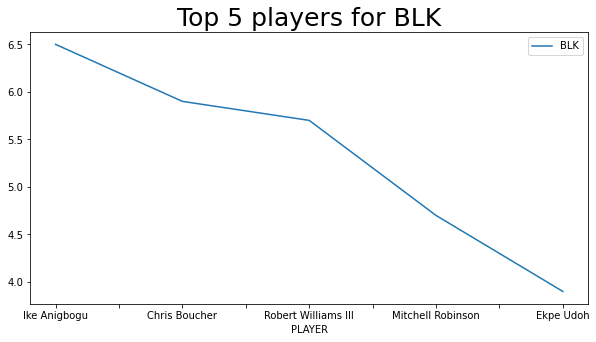

In [66]:
blk_list = df.sort_values('BLK',ascending=False)
blk_list = blk_list[:5]

blk_list.plot(x="PLAYER",y="BLK",figsize=(10,5))
plt.title("Top 5 players for BLK",loc='center',fontsize=25)
plt.show()

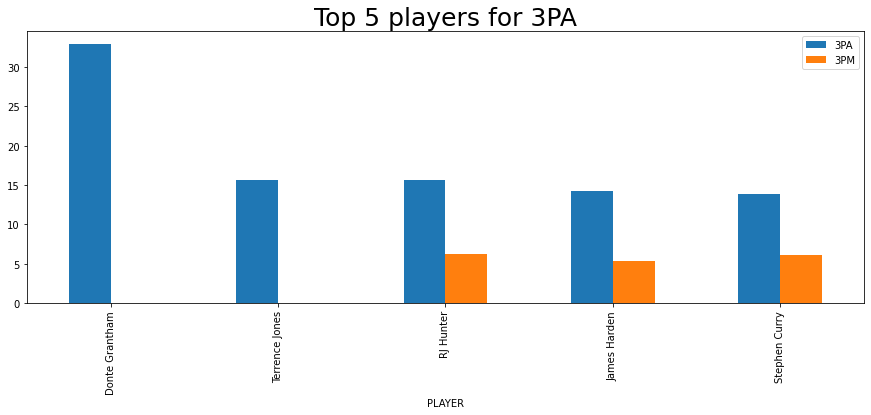

In [67]:
three_p = df.sort_values('3PA',ascending=False)
three_p = three_p[:5]
pa_3 = np.array([three_p['3PA']])
pm_3 = np.array([three_p['3PM']])

three_p.plot.bar(x='PLAYER',y={'3PA':pa_3,'3PM':pm_3},figsize=(15,5))

plt.title("Top 5 players for 3PA",loc='center',fontsize=25)
plt.show()

## K Means Clustering 

### Clustering for Field Goals

In [68]:
x = df.iloc[:, [3, 6]].values 

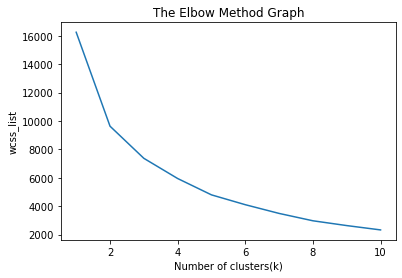

In [69]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')   #Within Cluster Sum of Squares
plt.show()

In [70]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

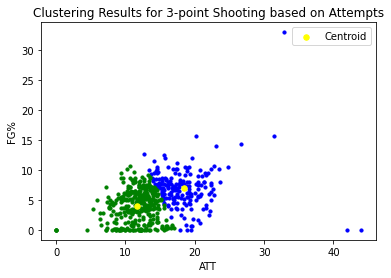

In [71]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 10, c = 'blue') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 10, c = 'green') #for second cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroid')   
plt.title('Clustering Results for 3-point Shooting based on Attempts')  
plt.ylabel('FG%')  
plt.xlabel('ATT')  
plt.legend()  
plt.show()

### Clustering for 3 Pointers

In [72]:
x = df.iloc[:, [3, 4]].values

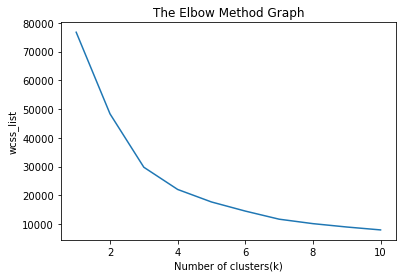

In [73]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  #Within Cluster Sum of Squares
plt.show()

In [74]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

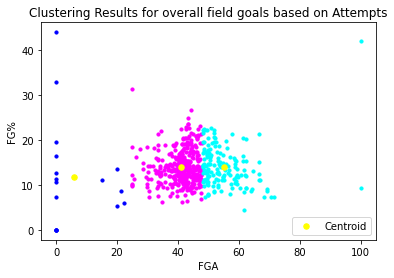

In [75]:
plt.scatter(x[y_predict == 0, 1],x[y_predict == 0, 0], s = 10, c = 'magenta') #for first cluster  
plt.scatter(x[y_predict == 1, 1], x[y_predict == 1, 0], s = 10, c = 'cyan') #for second cluster
plt.scatter(x[y_predict == 2, 1], x[y_predict == 2, 0], s = 10, c = 'blue') #for third cluster  
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 30, c = 'yellow', label = 'Centroid')   
plt.title('Clustering Results for overall field goals based on Attempts')  
plt.ylabel('FG%')  
plt.xlabel('FGA')  
plt.legend()  
plt.show()